# Medical Cost Insurance 

The given dataset contains the information about the persons who are eligible for the insurance premium by the insurance company

## Dataset



- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance


## Approach

The given problem is the prediction of insurance charges for the given input variables namely age, sex, bmi, children, smoker,
region

So to use regression algorithm to build a model and predict the respective insurance charges for the given input variables

Target variable - charges

Figuring out the best algorithm by conparing the performance of different regressors namely
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor 
4. Support Vector Regressor (SVM)
5. Gradient Boost Regressor (GBR)
6. K- Nearest Neighbor (KNN)


## Load the dataset

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
df = pd.read_csv("./insurance.csv")

## Exploratory Data Analysis

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
df.shape

(1338, 7)

In [41]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [42]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [43]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [44]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [45]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [48]:
df.dtypes[df.dtypes=='object'].index

Index(['sex', 'smoker', 'region'], dtype='object')

## Check for the missing data

In [49]:
# check for the missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Drop the Duplicates

In [50]:
df.shape

(1338, 7)

In [51]:
df = df.drop_duplicates()

In [52]:
df.shape # adjusted the one duplicate row

(1337, 7)

## Univariate Analysis

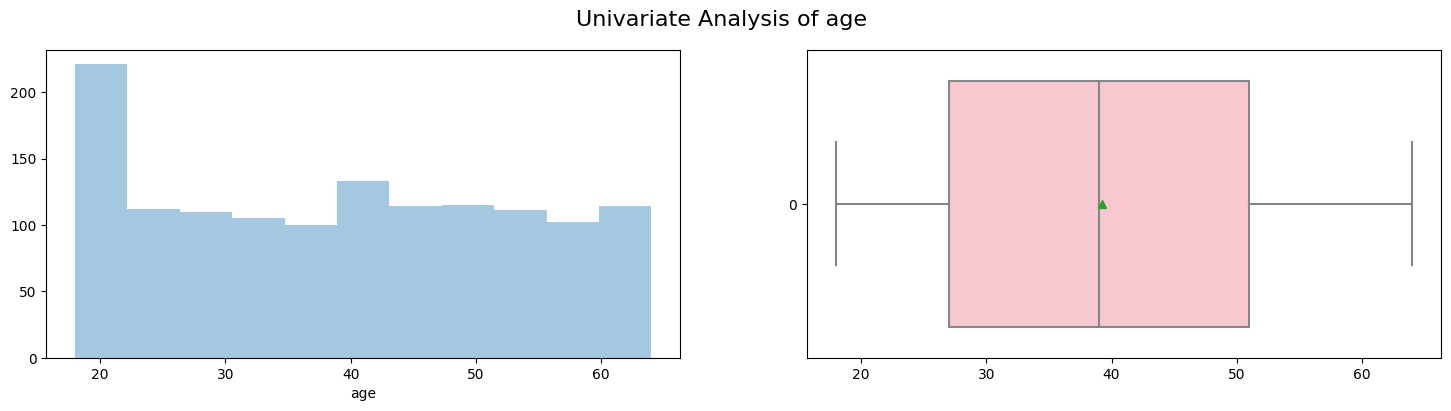

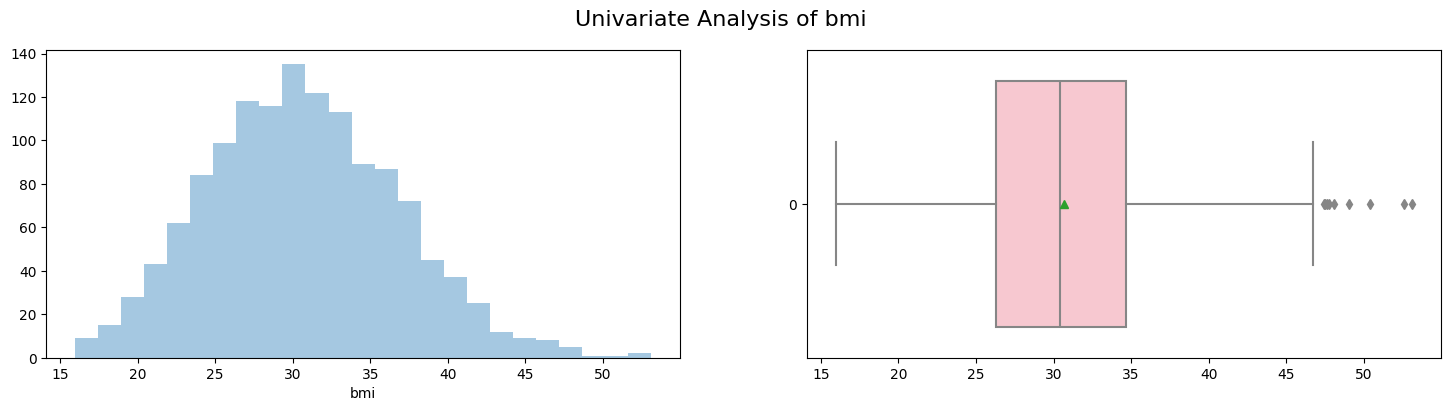

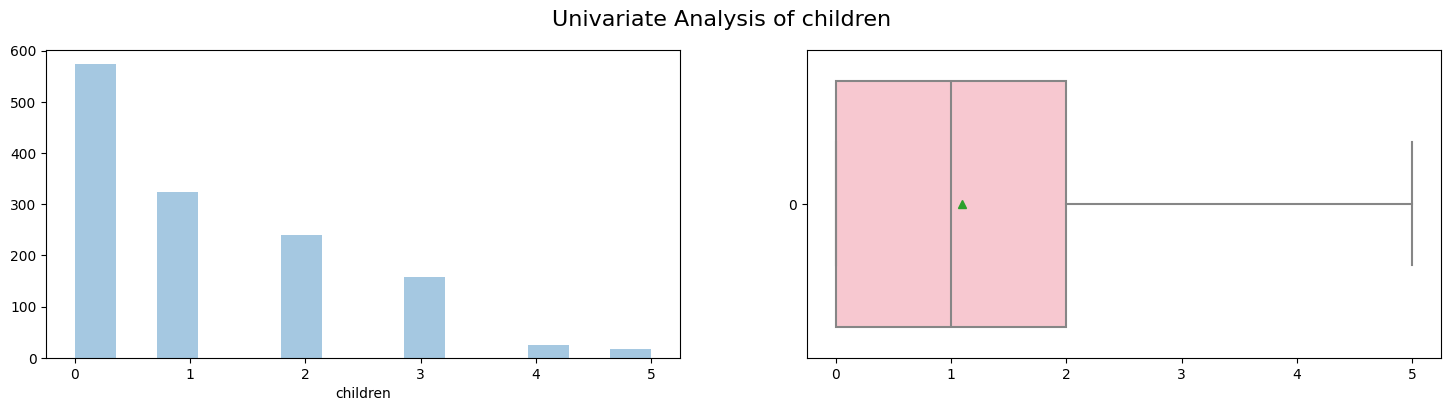

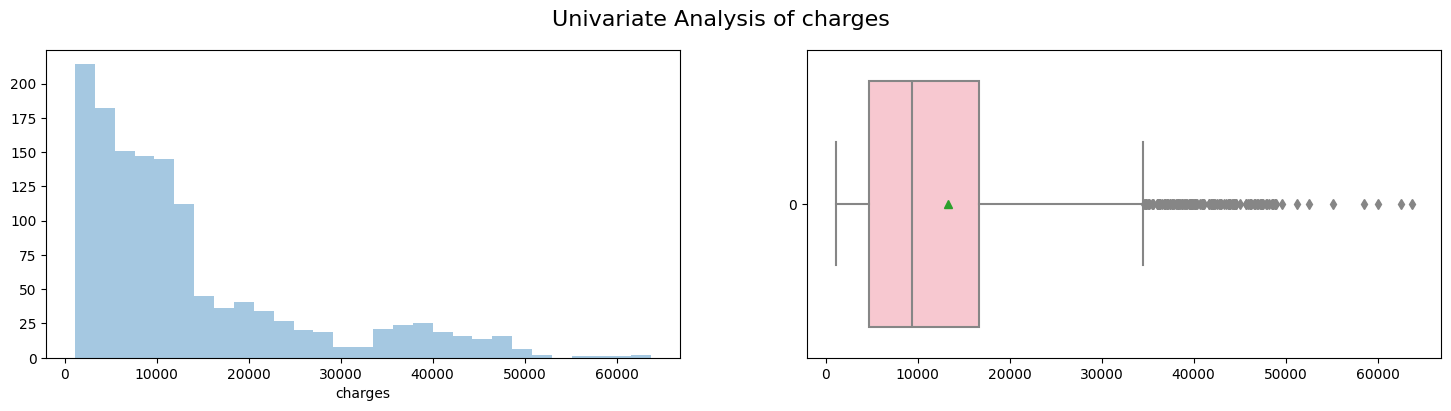

In [58]:
x_axis = ["age", "bmi", "children", "charges"]
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(df[x], ax=axes[0], kde = False)
    sns.boxplot(df[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

In [59]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

## Bi variate Analysis

In [60]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='charges'>

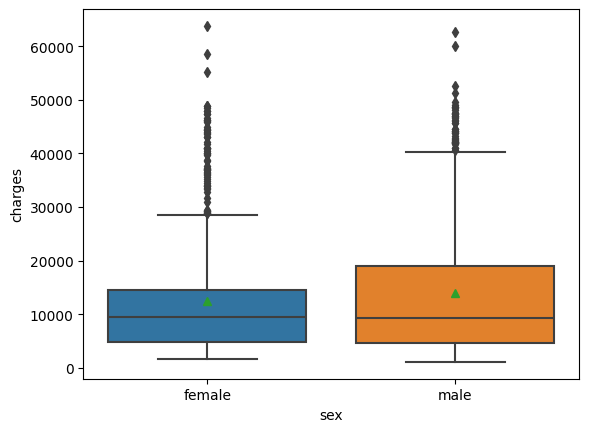

In [62]:
sns.boxplot(x = "sex", y = "charges", data = df, showmeans = True)

<Axes: xlabel='sex', ylabel='charges'>

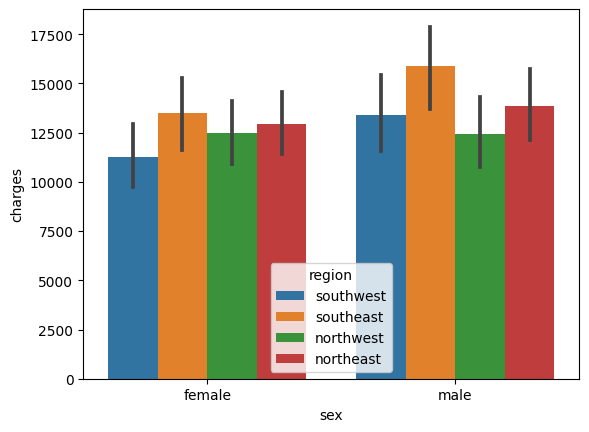

In [63]:
sns.barplot(x = "sex", y = "charges",hue='region', data = df)

<Axes: xlabel='children', ylabel='charges'>

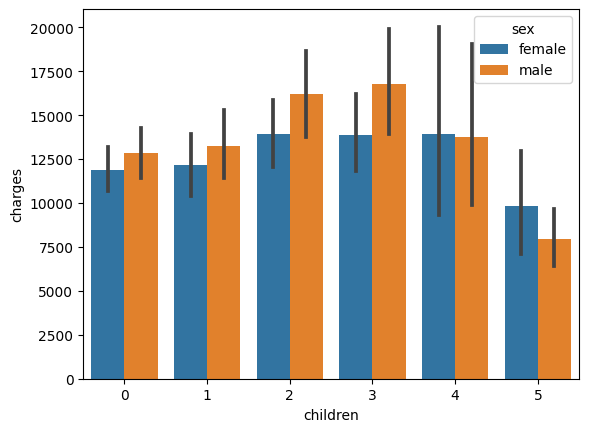

In [64]:
sns.barplot(x = "children", y = "charges",hue='sex', data = df)

In [65]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='smoker', ylabel='charges'>

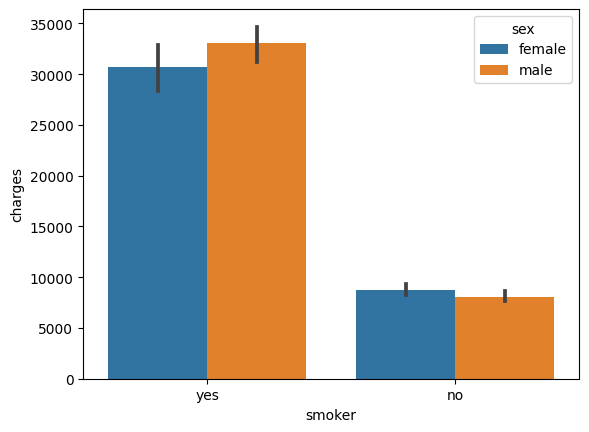

In [66]:
sns.barplot(x='smoker',y='charges',hue='sex',data=df)

Charges for smokers are greater than that of non smokers for both the genders

<Axes: xlabel='smoker', ylabel='charges'>

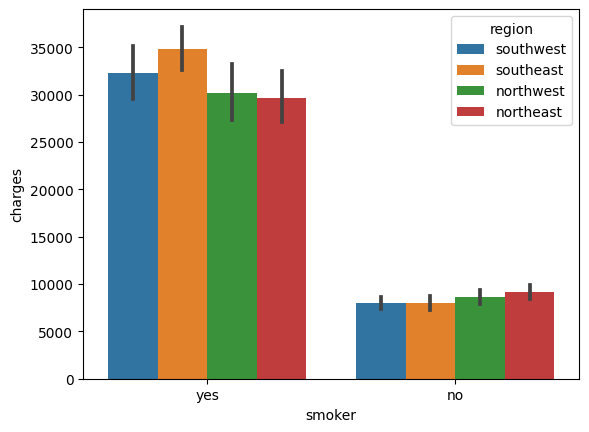

In [69]:
sns.barplot(x='smoker',y='charges',hue='region',data=df)

In [72]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

AttributeError: 'numpy.int32' object has no attribute 'startswith'

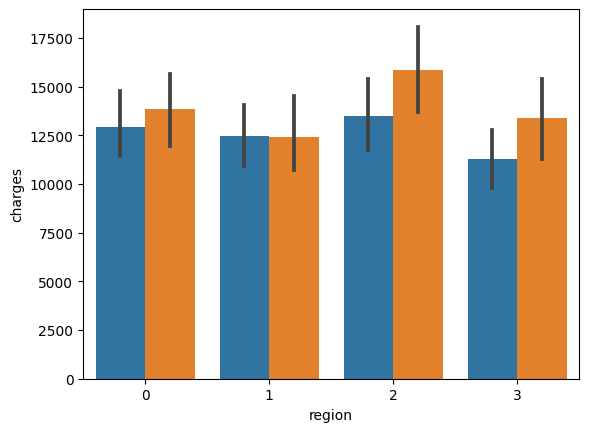

In [80]:
sns.barplot(x='region',y='charges',hue='sex',data=df)

## Correlation

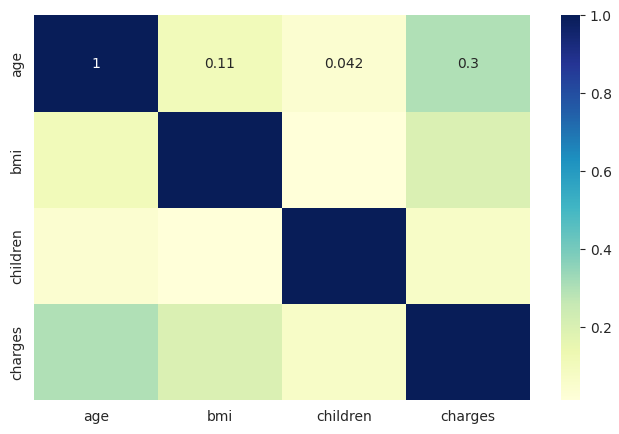

In [75]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 5))
    ax=sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [29]:
from sklearn import preprocessing as p
le = p.LabelEncoder()

In [76]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

## Compare Between Models

In [81]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

models = {     
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    "DT": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Score is {model.score(x_test, y_test)}')
    
    
    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')



Training Model LR 
-----------------------------------------------
Score is 0.8068466322629112
Training R-squared: 0.7297182858804965
Testing R-squared: 0.8068466322629112
Mean Squared Error: 35493102.61165051
Mean Absolute Error: 4182.353155288296
Training Model RF 
-----------------------------------------------
Score is 0.8926161788640776
Training R-squared: 0.9204236184532559
Testing R-squared: 0.8926161788640776
Mean Squared Error: 19732428.313630503
Mean Absolute Error: 2477.232889944481
Training Model DT 
-----------------------------------------------
Score is 0.7860952475391682
Training R-squared: 1.0
Testing R-squared: 0.7860952475391682
Mean Squared Error: 39306295.39188812
Mean Absolute Error: 2896.636137272388
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.8685562332667848
Training R-squared: 0.9919550224428867
Testing R-squared: 0.8685562332667848
Mean Squared Error: 24153589.217632025
Mean Absolute Error: 2643.9228870038114
Tr

So by this different evaluation we can see that <b>Random Forest</b> has lower MAE value as compared to other models. So we can conclude that model 3 i.e. Random Forest Regressor is the best model for our dataset. So Random Foreset Model is used for predictions and deployment.

## Feature Importance

In [85]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [86]:
print(model.feature_importances_)

[0.12958613 0.01033104 0.19255768 0.02458988 0.62056564 0.02236963]


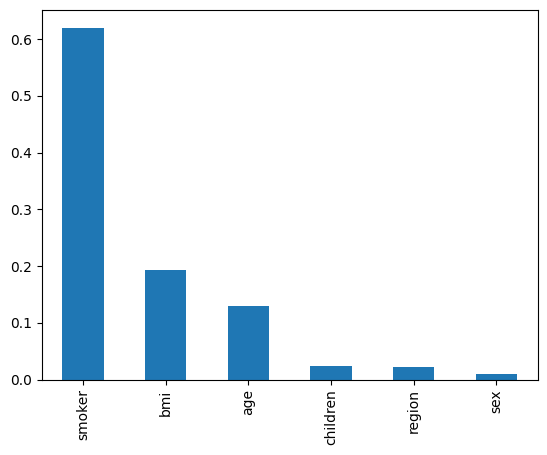

In [88]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

In [89]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [90]:
## Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [93]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [94]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10,
                              cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [96]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [97]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [98]:
rf_random.best_score_

-23799277.715055365

In [99]:
y_pred3 = rf_random.predict(x_test)

In [100]:
# Evaluating the Algorithm
score3 = r2_score(y_test, y_pred3)
print(score3)

0.8765294259310626


In [101]:
df_3 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred3,'Variance':y_test-y_pred3})
df_3.head()

,Actual,Predicted,Variance
900,8688.85885,9865.292092,-1176.433242
1064,5708.86700,7619.802774,-1910.935774
1256,11436.73815,13373.323123,-1936.584973
298,38746.35510,37112.834057,1633.521043
237,4463.20510,5731.867260,-1268.662160


Text(0.5, 0.98, 'Actual vs Predicted')

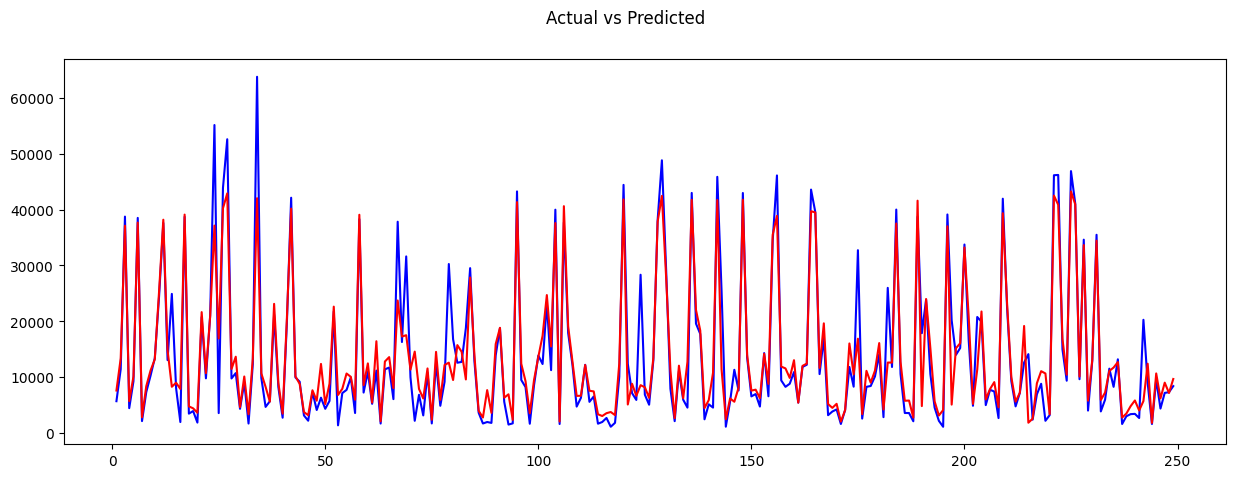

In [102]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred3[1:250],color="red")
fig.suptitle("Actual vs Predicted")

## Save Model Using Joblib

In [104]:
# import joblib
# joblib.dump(rf_random,'model_random_forest_regression')
# model = joblib.load('model_random_forest_regression')

In [109]:
import pickle 
pickle_out = open("rfclassifier.pkl", "wb") 
pickle.dump(rf_random, pickle_out) 
pickle_out.close()

In [114]:
pickle_in = open('rfclassifier.pkl', 'rb') 
model = pickle.load(pickle_in) 

In [115]:
# Predict the new customer
data = {'age':40,
        'sex':1,
        'bmi':40.30,
        'children':4,
        'smoker':1,
        'region':2}

new_df = pd.DataFrame(data,index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [116]:
model.predict(new_df)

array([39102.47053292])